In [1]:
from relaqs import RESULTS_DIR
from relaqs.api import load_pickled_env_data
import numpy as np

2025-02-03 09:47:23,037	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-03 09:47:25,835	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-03 09:47:31,717	WARNING __init__.py:10 -- DDPG has/have been moved to `rllib_contrib` and will no longer be maintained by the RLlib team. You can still use it/them normally inside RLlib util Ray 2.8, but from Ray 2.9 on, all `rllib_contrib` algorithms will no longer be part of the core repo, and will therefore have to be installed separately with pinned dependencies for e.g. ray[rllib] and other packages! See https://github.com/ray-project/ray/tree/master/rllib_contrib#rllib-contrib for more information on the RLlib contrib effort.


In [20]:
path = '2025-01-21_10-40-03_arbitrary-gate'
data_path = RESULTS_DIR + path + '/env_data.pkl'

df = load_pickled_env_data(data_path)

last_n = 1000

fidelity = df["Fidelity"].tail(last_n)
reward = df["Rewards"].tail(last_n)
actions = df["Actions"].tail(last_n)
operator = df["Operator"].tail(last_n)
target_operator = df["Target Operator"].tail(last_n)
episode_id = df["Episode Id"].tail(last_n)

n_lowest = 10
fidelities_np = fidelity.to_numpy()
lowest_fidelities = np.partition(fidelities_np, n_lowest)[:n_lowest]
lowest_fidelities_indices = np.argsort(fidelities_np)[:n_lowest]

lowest_fidelities_operators = operator.to_numpy()[lowest_fidelities_indices]
lowest_fidelity_target_operators = target_operator.to_numpy()[lowest_fidelities_indices]

print("Target operators corresponding to the worst fidelity:")
for i in range(n_lowest):
    print("Fidelity:", lowest_fidelities[i])
    print("Target:", lowest_fidelity_target_operators[i])
    print("Operator:", lowest_fidelities_operators[i], "\n")

Target operators corresponding to the worst fidelity:
Fidelity: 0.01784890042220199
Target: [[ 0.16135608+0.7011342j  -0.30697655+0.62300919j]
 [ 0.30697655+0.62300919j  0.16135608-0.7011342j ]]
Operator: [[-0.89309501+0.38278605j  0.21579499-0.09637773j]
 [-0.21579499-0.09637773j -0.89309501-0.38278605j]] 

Fidelity: 0.008969890161751724
Target: [[-0.66467815+0.56746664j  0.31864829-0.36694391j]
 [-0.31864829-0.36694391j -0.66467815-0.56746664j]]
Operator: [[ 0.63136767+0.77480562j -0.00203386+0.03235706j]
 [ 0.00203386+0.03235706j  0.63136767-0.77480562j]] 

Fidelity: 0.007498736821867364
Target: [[-0.40232357+0.24869474j  0.65401778+0.59037904j]
 [-0.65401778+0.59037904j -0.40232357-0.24869474j]]
Operator: [[ 0.5381968 +0.81969979j  0.14856831-0.12792154j]
 [-0.14856831-0.12792154j  0.5381968 -0.81969979j]] 

Fidelity: 0.009416014533201261
Target: [[-0.31288713-0.20235112j -0.92579996-0.06364036j]
 [ 0.92579996-0.06364036j -0.31288713+0.20235112j]]
Operator: [[-0.11329249+0.43203423

In [21]:
import qutip

In [22]:
lowest_fidelities_operators[0]

array([[-0.89309501+0.38278605j,  0.21579499-0.09637773j],
       [-0.21579499-0.09637773j, -0.89309501-0.38278605j]])

In [23]:
target_states

[array([0.16135608+0.7011342j , 0.30697655+0.62300919j]),
 array([-0.66467815+0.56746664j, -0.31864829-0.36694391j]),
 array([-0.40232357+0.24869474j, -0.65401778+0.59037904j]),
 array([-0.31288713-0.20235112j,  0.92579996-0.06364036j]),
 array([-0.16343353-0.28731356j,  0.14978957-0.93182803j]),
 array([0.0652368 -0.41316266j, 0.84402293-0.33565767j]),
 array([0.10049474+0.44770546j, 0.86622696+0.19776621j]),
 array([-0.08437051+0.20284932j,  0.9685652 -0.11668432j]),
 array([-0.48671318+0.08673563j, -0.55870196+0.66591241j]),
 array([-0.33943977-0.02878601j,  0.48680652+0.80434533j])]

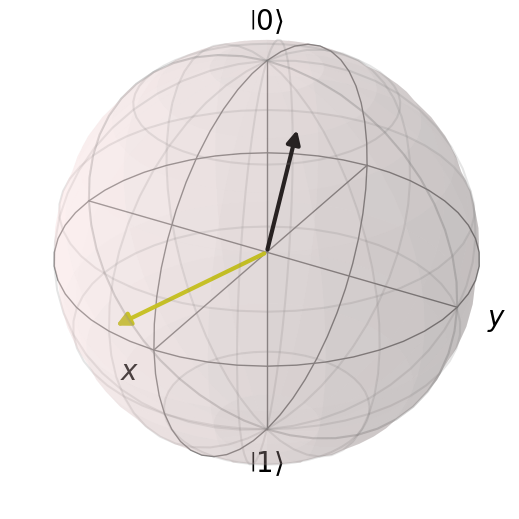

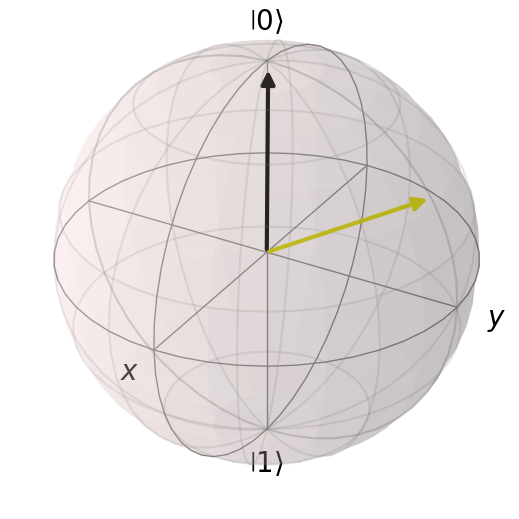

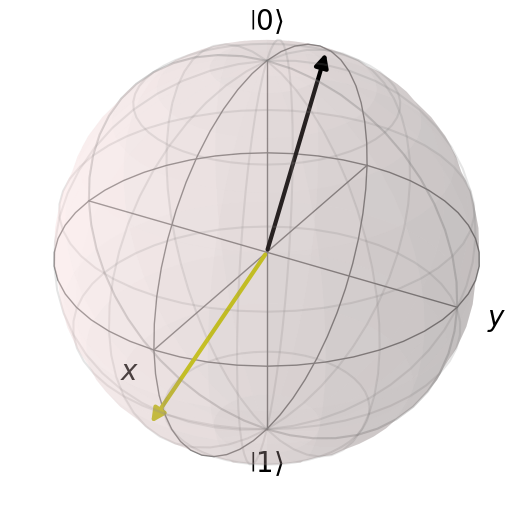

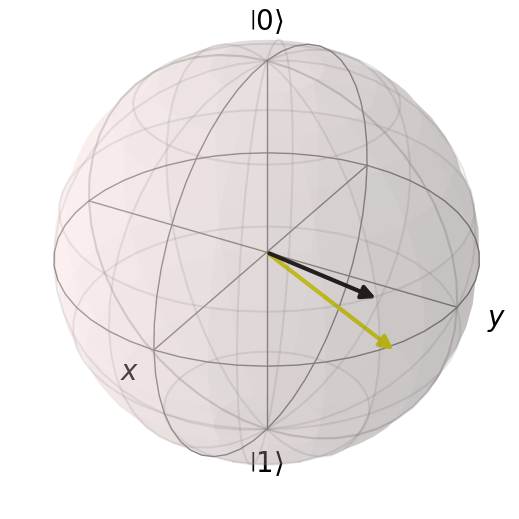

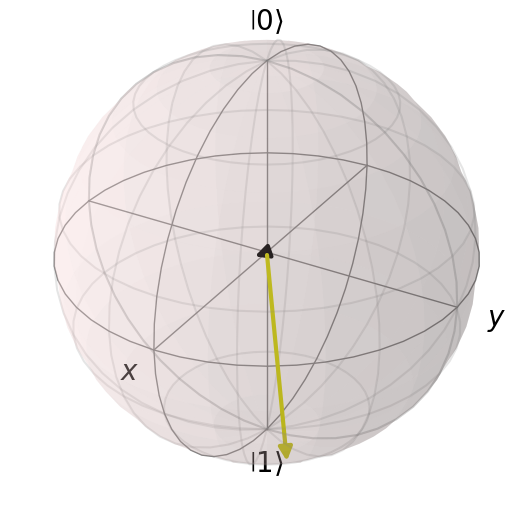

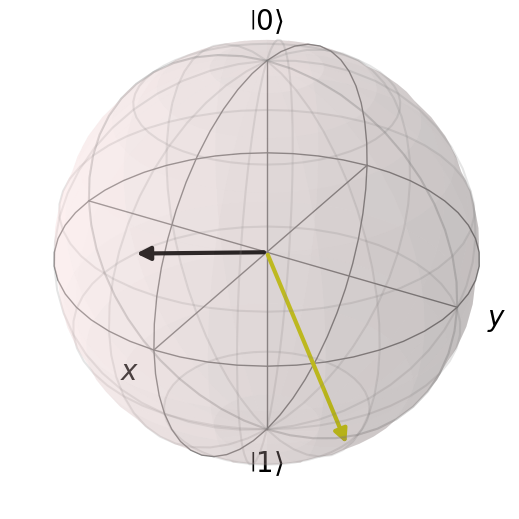

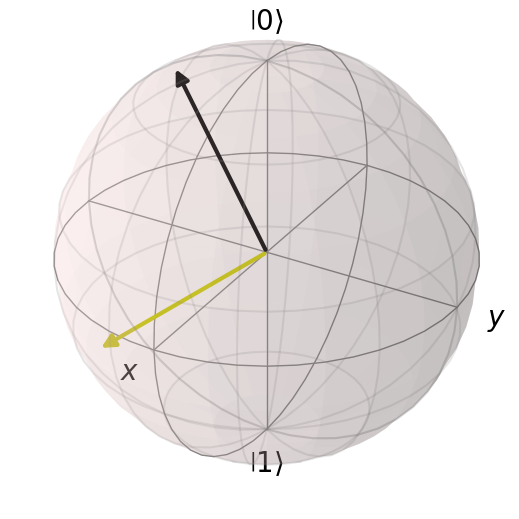

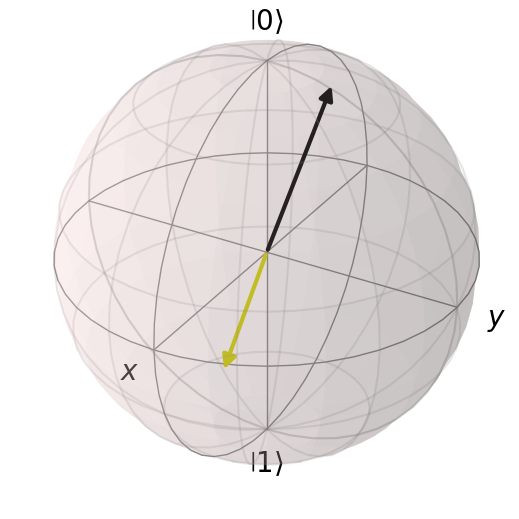

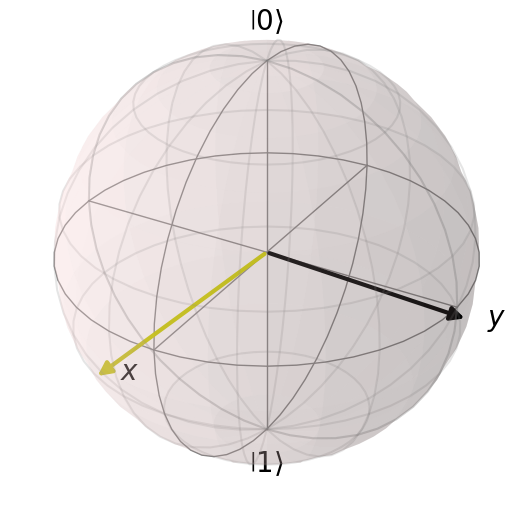

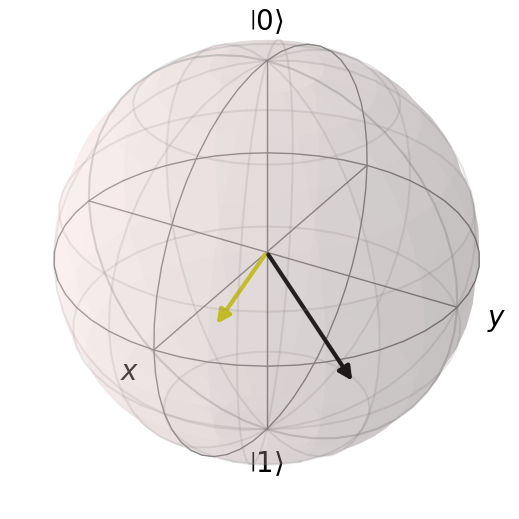

In [28]:
target_states = [np.matmul(operator, np.array([1, 0])) for operator in lowest_fidelity_target_operators]
final_states = [np.matmul(operator, np.array([1, 0])) for operator in lowest_fidelities_operators]

for i in range(10):
    q_objs = [qutip.Qobj(target_states[i]), qutip.Qobj(final_states[i])]
    #q_objs = [qutip.Qobj(target_states[i])]
    #q_objs = [qutip.Qobj(final_states[i])]

    b = qutip.Bloch()
    b.add_states(q_objs)
    b.vector_color = ['y', 'k']
    b.show()